# Caso SVR 2: Stock Prediction Support Vector Regression Model

El DataSet es de Microsoft Stock Data (MSFT) alojado en Kaggle

Los Modelos de Support Vector Regression usados son: 

1. lineal
2. polinómico
3. RBF

Para predecir los Precios Altos de las acciones futuras


## Importamos las librerías

In [ ]:
import csv
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

## Ejecutamos el siguiente comando para acceder a la API de Kaggle

Lee los datos de la fuente en línea, actualizada diariamente

fuente de comandos para Cargar Datasets de Kaggle en Google Colab : https://siriasadeddin.wixsite.com/siriaai/post/c%C3%B3mo-cargar-datasets-de-kaggle-en-google-colab

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"juncaperezlopez","key":"6f9d3542b4c9e7cdf666623d67e0744f"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d varpit94/microsoft-stock-data

microsoft-stock-data.zip: Skipping, found more recently modified local copy (use --force to force download)


Leemos los datos con el método read_csv()

In [ ]:
data1 = pd.read_csv('/content/microsoft-stock-data.zip')

data1['Date'] = pd.to_datetime(data1['Date']) # formato fecha

data = data1[data1["Date"].isin(pd.date_range('2019-01-01', '2019-01-30'))]

data["Date"] = data["Date"].astype(str)# tipo string

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Date,Open,High,Low,Close,Adj Close,Volume
8269,2019-01-02,99.550003,101.750000,98.940002,101.120003,97.580673,35329300
8270,2019-01-03,100.099998,100.190002,97.199997,97.400002,93.990860,42579100
8271,2019-01-04,99.720001,102.510002,98.930000,101.930000,98.362305,44060600
8272,2019-01-07,101.639999,103.269997,100.980003,102.059998,98.487755,35656100
8273,2019-01-08,103.040001,103.970001,101.709999,102.800003,99.201874,31514400
8274,2019-01-09,103.860001,104.879997,103.239998,104.269997,100.620407,32280800
8275,2019-01-10,103.220001,103.750000,102.379997,103.599998,99.973846,30067600
8276,2019-01-11,103.190002,103.440002,101.639999,102.800003,99.201874,28314200
8277,2019-01-14,101.900002,102.870003,101.260002,102.050003,98.478111,28437100
8278,2019-01-15,102.510002,105.050003,101.879997,105.010002,101.334496,31587600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 8269 to 8288
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   Open       20 non-null     float64
 2   High       20 non-null     float64
 3   Low        20 non-null     float64
 4   Close      20 non-null     float64
 5   Adj Close  20 non-null     float64
 6   Volume     20 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
# Creamos la una función get_data () para obtener los dos últimos caracteres de Date
def get_data(data):  
    df = data.copy()
    df['Date'] = df['Date'].str.split('-').str[2]
    df['Date'] = pd.to_numeric(df['Date'])
    return [ df['Date'].tolist(), df['High'].tolist() ] # Convert Series to list

dates, prices = get_data(data)

print(dates, prices)

[2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 22, 23, 24, 25, 28, 29, 30] [101.75, 100.190002, 102.510002, 103.269997, 103.970001, 104.879997, 103.75, 103.440002, 102.870003, 105.050003, 106.260002, 106.629997, 107.900002, 107.099998, 107.040001, 107.0, 107.879997, 106.480003, 104.970001, 106.379997]


Entrena los modelos y los graficamos, devolviendo la predicción de cada modelo en el día x, a través de una función llamada predict_prices()

In [ ]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # convirtiendo en matriz de n X 1
    x = np.reshape(x,(len(x), 1))

    # Definición de los modelos de Support Vector Regression (SVR)
    svr_lin = SVR(kernel= 'linear', C= 1e3)
    svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) 
    
    # Ajustar los parámetros de regresión lineal a los datos
    svr_rbf.fit(dates, prices) 
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)

    # Trazar el diagrama de dispersión con scatter() para comparar los valores de dates vs prices
    plt.scatter(dates, prices, color= 'black', label= 'Data')

    # Trazando la línea hecha por el kernel RBF 
    plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model')

    # Trazando la línea hecha por el kernel lineal 
    plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model')

    # Trazando la línea hecha por el kernel Polinómico 
    plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') 

    # Definimos el texto para las etiquetas
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

## Obtenga la predicción y trace los modelos predictivos

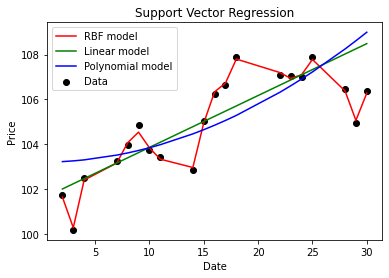

In [ ]:
%matplotlib inline

predicted_price = predict_prices(dates, prices, [31])

Imprimimos los resultados de la predicción para cada modelo 

In [ ]:
print("RBF:", predicted_price[0],"LIN:", predicted_price[1],"POLY:", predicted_price[2])

RBF: 109.18642746995138 LIN: 108.71823652944795 POLY: 109.3865441037023


verificamos el precio alto para el 2019-1-31

In [ ]:
data1['Date'] = pd.to_datetime(data1['Date']) # formato fecha

price = data1[data1["Date"].isin(pd.date_range('2019-01-31', '2019-01-31'))]

print(price['High'])

8289    105.220001
Name: High, dtype: float64
